### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.cluster import KMeans

# making data frame from csv file 
vehicle_df_orig = pd.read_csv("vehicle.csv") 
  
# making new data frame with dropped NA values 
vehicle_df = vehicle_df_orig.dropna(axis = 0, how ='any') 

# comparing sizes of data frames 
print("Old data frame length:", len(vehicle_df_orig), "\nNew data frame length:",  
       len(vehicle_df), "\nNumber of rows with at least 1 NA value: ", 
       (len(vehicle_df_orig)-len(vehicle_df)))
vehicle_df.info()

Old data frame length: 846 
New data frame length: 813 
Number of rows with at least 1 NA value:  33
<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null int64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null int64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null int64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1    

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

car    413
bus    205
van    195
Name: class, dtype: int64


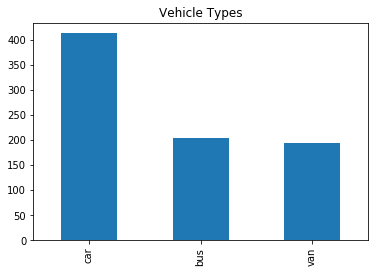

In [2]:
vehicle_df['class'].value_counts().plot.bar(title='Vehicle Types') 
print(vehicle_df['class'].value_counts())

### Check for any missing values in the data 

In [3]:
print(vehicle_df.isnull().sum())
total_missing_values = vehicle_df.isnull().sum().sum() + vehicle_df.isna().sum().sum()
print('There are {} missing values in the vehicle database'.format(total_missing_values))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64
There are 0 missing values in the vehicle database


### 3. Standardize the data 

Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [4]:
from scipy.stats import zscore

numeric_cols = vehicle_df.drop('class', axis=1)

vehicle_type  = vehicle_df.pop("class")

numeric_cols = numeric_cols.apply(zscore)

vehicle_df = numeric_cols.join(vehicle_type)   # Recreating vehicle_df by combining numerical columns with vehicle types

vehicle_df

compactness  circularity  distance_circularity  radius_ratio  \
0       0.163231     0.520408              0.060669      0.264970   
1      -0.322874    -0.619123              0.124067     -0.836393   
2       1.256966     0.845988              1.518823      1.187734   
3      -0.079822    -0.619123             -0.002729     -0.300595   
4      -1.052030    -0.130753             -0.763506      1.068668   
..           ...          ...                   ...           ...   
841    -0.079822    -0.944703              0.314261      0.413803   
842    -0.565926     0.194828              0.124067     -0.181529   
843     1.500018     1.497149              1.201833      1.574700   
844    -0.930504    -1.433074             -0.256321     -0.687560   
845    -1.052030    -1.433074             -1.017098     -1.372192   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                1.283254                 0.299721      -0.198517   
1               -0.599253                 0.085785      -0.591720   
2                0.530251                 0.299721       1.162569   
3                0.153750                 0.085785      -0.742952   
4                5.173770                 9.285029      -0.591720   
..                    ...                      ...            ...   
841              0.279250                -0.128151       0.013207   
842              0.530251                 0.513657      -0.289256   
843              0.655752                 0.727593       1.616264   
844             -0.473753                -0.342087      -1.015169   
845             -0.850254                -0.769959      -1.468864   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0         0.129648               -0.217151                   0.766312   
1         0.514333               -0.606014                  -0.337462   
2        -1.152637                0.949438                   0.697326   
3         0.642562               -0.606014                  -0.337462   
4         0.514333               -0.606014                  -0.268476   
..             ...                     ...                        ...   
841      -0.126809               -0.217151                  -0.958335   
842       0.257876               -0.217151                   0.766312   
843      -1.409094                1.727163                   1.732113   
844       1.155476               -0.994877                  -1.648193   
845       1.924847               -1.383740                  -1.372250   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0          -0.397397          -0.339014                   0.301676   
1          -0.590034          -0.618754                  -0.502972   
2           1.111591           1.122486                   1.415804   
3          -0.911095          -0.738643                  -1.462359   
4           1.689501          -0.647299                   0.425468   
..               ...                ...                        ...   
841         0.373150          -0.093528                  -0.781504   
842        -0.493716          -0.401813                   0.054092   
843         1.272121           1.613458                   0.796844   
844        -1.071626          -0.961293                  -0.812452   
845        -1.553218          -1.292414                  -1.338567   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                      -0.321192       -0.071523          0.371287   
1                      -0.053505        0.538425          0.147109   
2                       0.080339        1.555006         -0.413338   
3                      -1.258099       -0.071523         -0.301249   
4                       7.307905        0.538425         -0.189159   
..                           ...             ...               ...   
841                    -0.053505        0.131793          1.380091   
842                    -0.053505       -1.088104          0.819644   

<IPython.core.display.Javascript object>

List of Outliers detected for - compactness 
  Series([], Name: compactness, dtype: float64)
List of Outliers detected for - circularity 
  Series([], Name: circularity, dtype: float64)
List of Outliers detected for - distance_circularity 
  Series([], Name: distance_circularity, dtype: float64)
List of Outliers detected for - radius_ratio 
  37     4.075093
135    4.551358
388    4.878790
Name: radius_ratio, dtype: float64
List of Outliers detected for - pr.axis_aspect_ratio 
  4      5.173770
37     8.060282
100    8.060282
135    8.938785
291    5.048270
388    9.566288
523    4.420767
706    5.424771
Name: pr.axis_aspect_ratio, dtype: float64
List of Outliers detected for - max.length_aspect_ratio 
  4      9.285029
37     8.643222
100    9.285029
127    2.866952
135    8.429286
291    7.359606
388    8.643222
391    3.508760
523    8.001414
544    2.225144
655   -1.411767
706    9.926837
815    2.866952
Name: max.length_aspect_ratio, dtype: float64
List of Outliers detected for - 

<IPython.core.display.Javascript object>

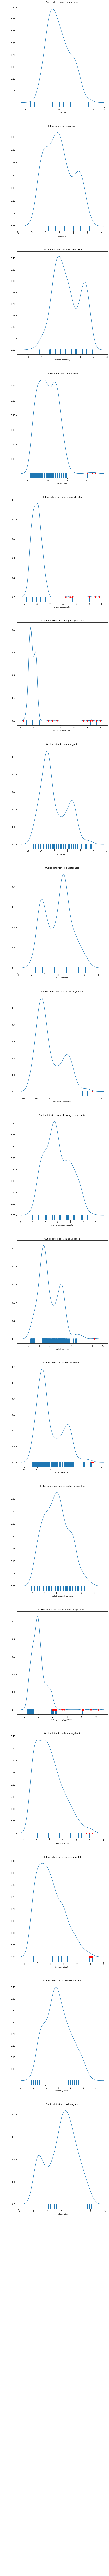

In [5]:
# The below function is inspired from the article https://kite.com/blog/python/data-analysis-visualization-python/
# Checking for Outliers in the data
# IQR based outlier identification - Distplot
def IQR_based_outlier(data, threshold = 1.5):
    IQR = np.quantile(data, 0.75) - np.quantile(data, 0.25)
    minval = np.quantile(data,0.25) - IQR * threshold
    maxval = np.quantile(data,0.75) + IQR * threshold
    return (data < minval)|(data > maxval)

col_names = vehicle_df.select_dtypes(include=['float64','int64']).columns

fig, ax = plt.subplots(len(col_names), figsize=(8,200))

for i, col_val in enumerate(col_names):
    x = vehicle_df[col_val][:1000]
    sns.distplot(x, ax=ax[i], rug=True, hist=False)
    outliers = x[IQR_based_outlier(x)]
    print('List of Outliers detected for - {} \n '.format(col_val),outliers)
    ax[i].plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    ax[i].set_title('Outlier detection - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

# No outliers detected for the following columns(10)
# Compactness, Circularity, distance_circularity, scatter_ratio, elogatedness, axis_rectangularity 
# max.length_rectangularity, sclaed_radius_of_gyration and skewness_about.2 and hollows_ratio

# Outliers detected for the following columns(8)
# radius_ratio(3), pr.axis_aspect_ratio(7), max.length_aspect_ratio(10), scaled_variance(1), scaled_variance.1(2)
# scaled_radius_of_gyration.1(10), skewness_about(3) and skewness_about.1(3)

# with univariate analysis of these columns we are looking at a minimum of 2 clusters to maximum of 6 clusters

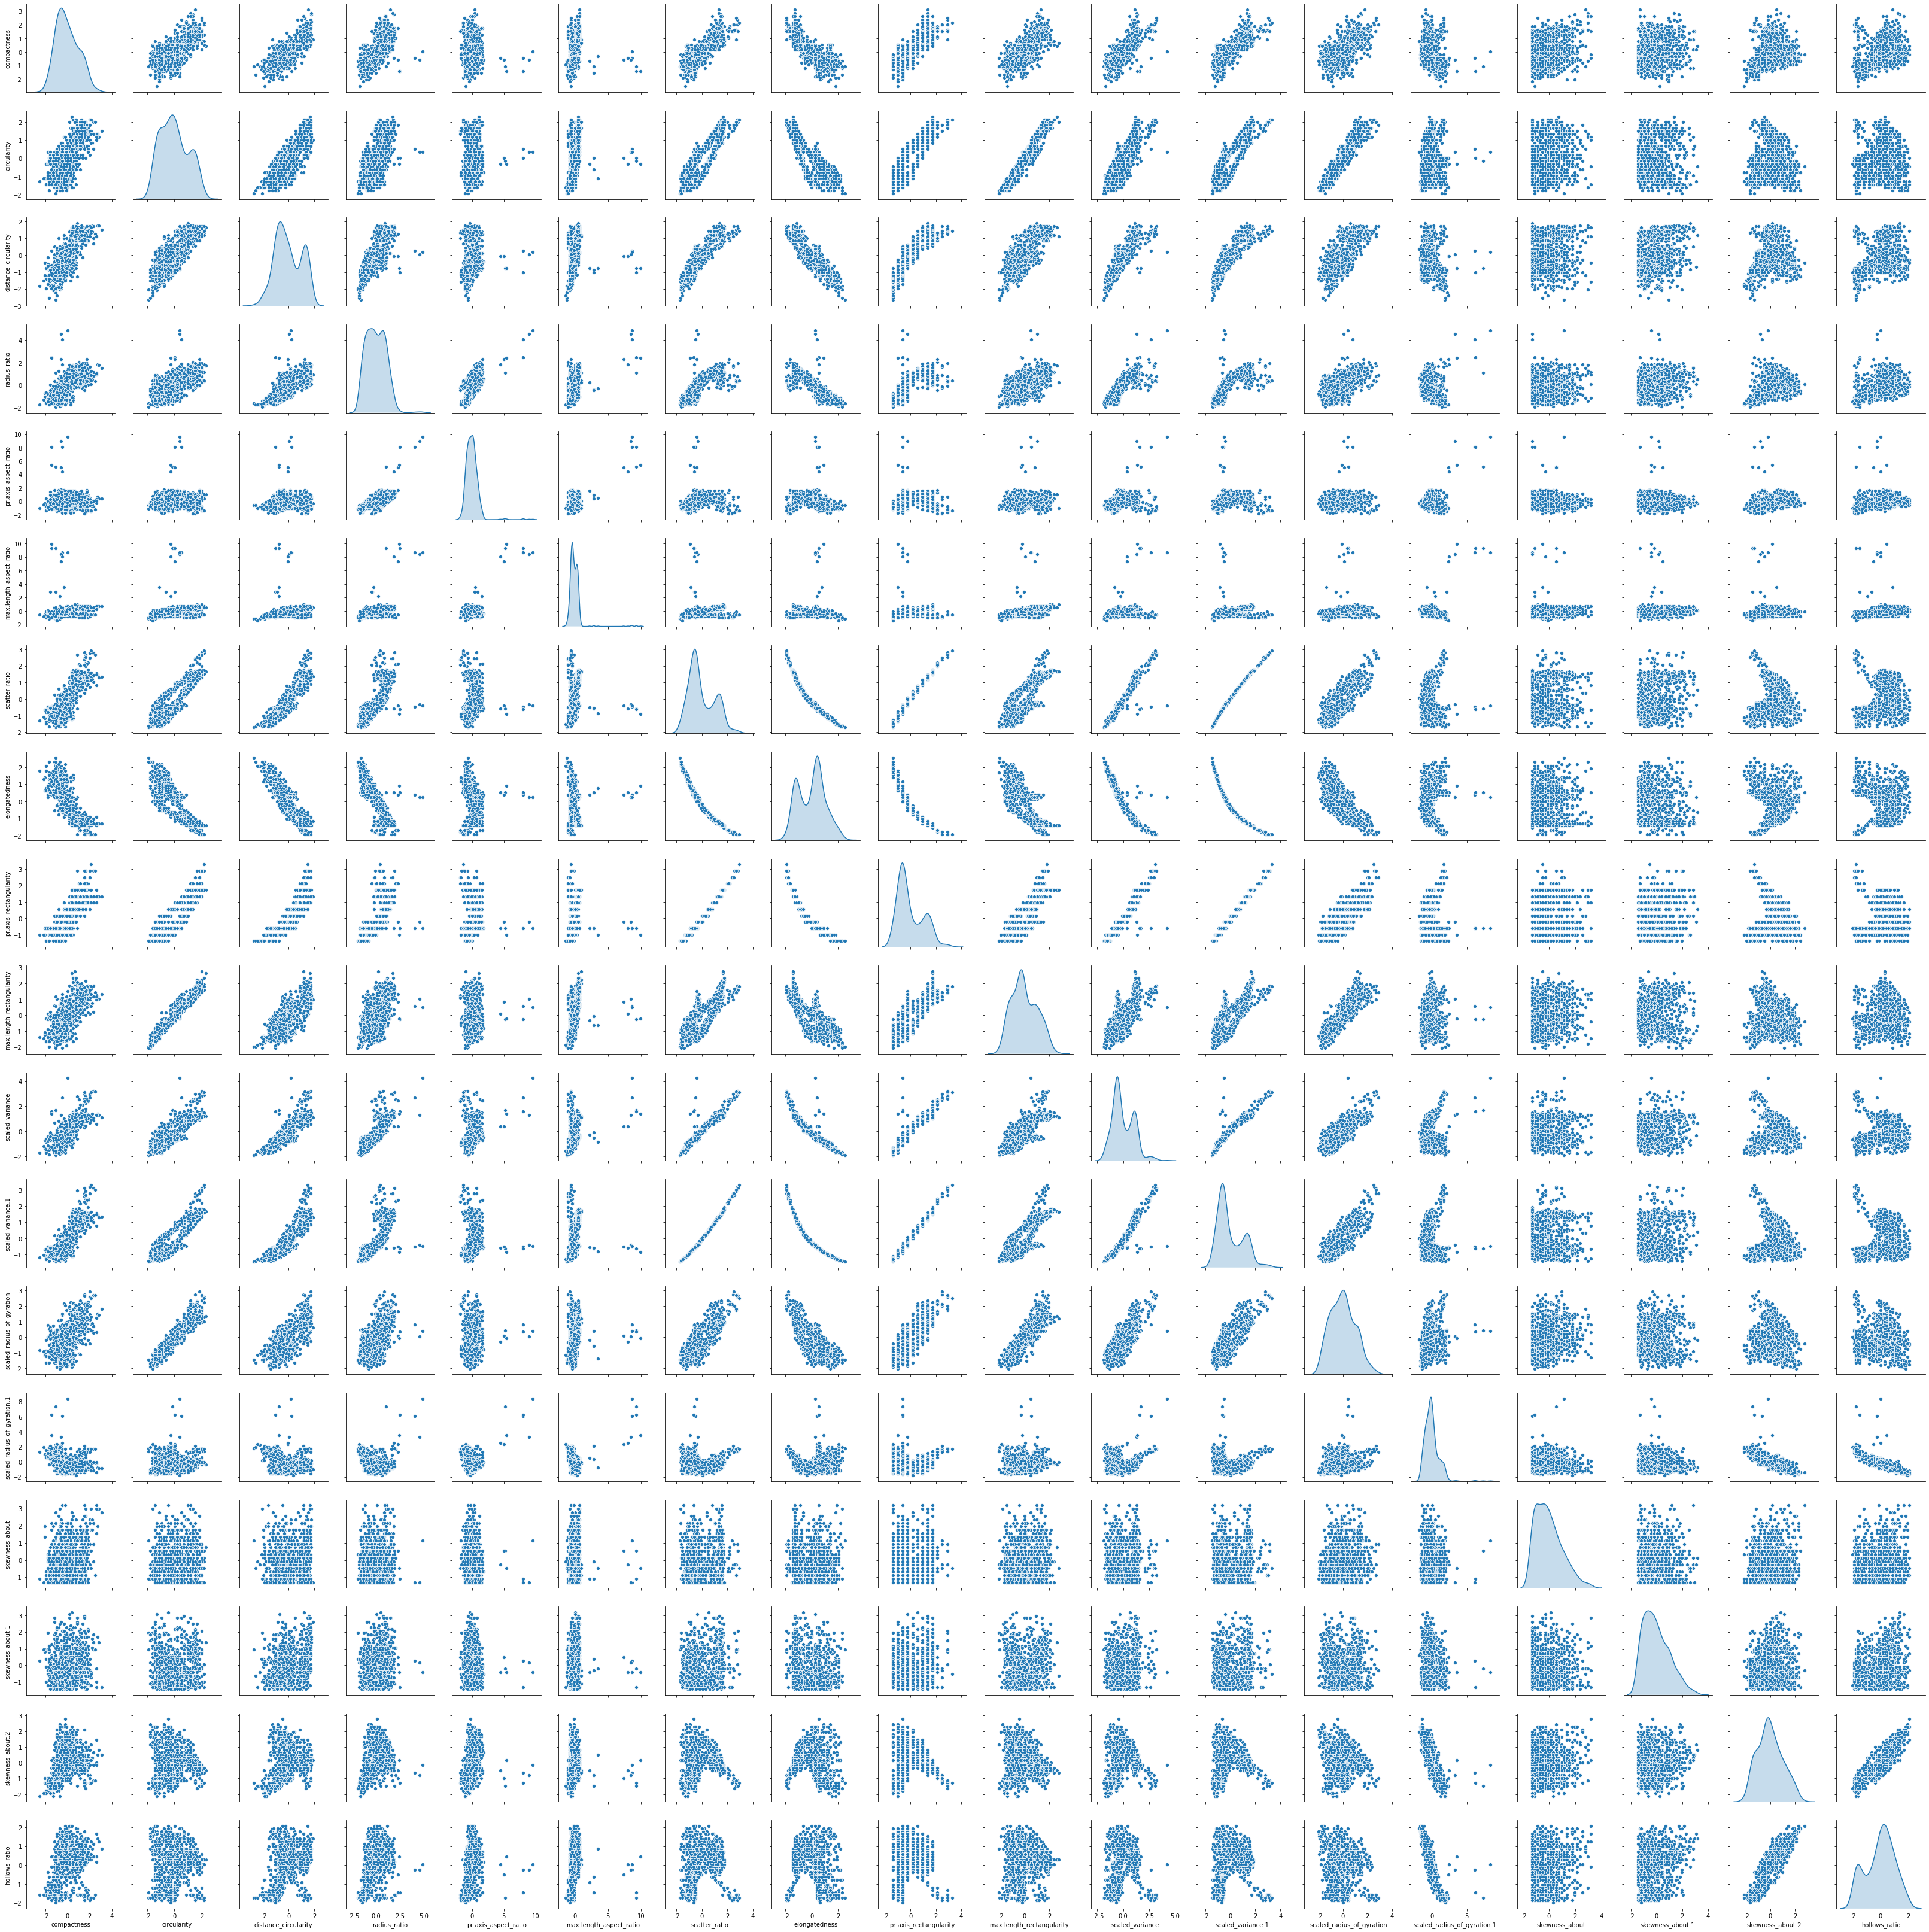

In [6]:
# Bi-variate analysis and visual cue for no of clusters
sns.pairplot(vehicle_df, diag_kind = 'kde')
# Based on the Peaks, we can infer that there are 3 clusters in this data

<IPython.core.display.Javascript object>

(18.0, 0.0)

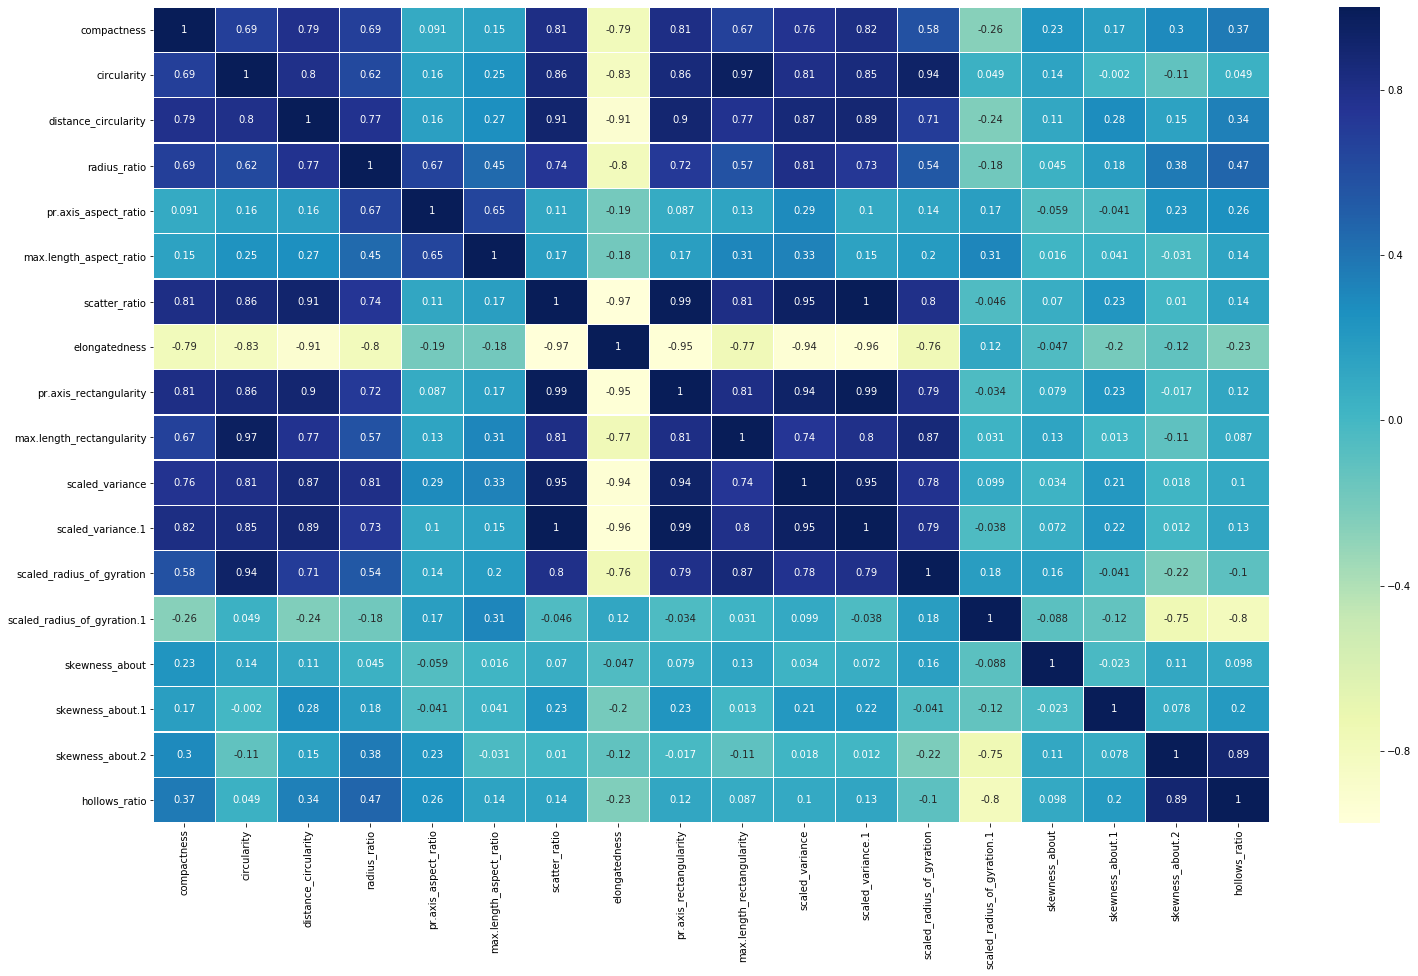

In [7]:
# Finding multi-collinearity - Bi-Variate Analysis
plt.figure(figsize=(25, 15))
ax = sns.heatmap(vehicle_df.corr(),annot = True, linewidths = 0.5, cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
# We see lot of multi-collinearity between features and ideal way to do better clustering would be to work on outliers 
# and features selection before clustering
# Elongatedness is negatively correlated and highlhy collinear with most of the features
# Compactness, Circularity, distance circularity is positively correlated with most of the features
# pr.axis_rectangulariy, max_length_rectangularity, scaled_variance, 
# Scaled_variance_1 and Scaled_radius_of_gyration +VE CORR

### K - Means Clustering

### Assign a dummy array called Cluster_error

In [8]:
Cluster_error = []

### 5. Calculate errorrs for each K

Iterating values of k from 1 to 10 fit K means model
Using inertia

In [9]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)

In [10]:
# Iterating from K = 1 to 10 and getting the SSE for each Kmeans 
vehicle_df_features = vehicle_df.drop('class', axis=1)
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(vehicle_df_features)
    prediction=model.predict(vehicle_df_features)
    Cluster_error.append(sum(np.min(cdist(vehicle_df_features, model.cluster_centers_, 'euclidean'), axis=1)) / vehicle_df_features.shape[0])

### 6. Plotting Elbow/ Scree Plot

Use Matplotlib to plot the scree plot - Note: Scree plot plots Errors vs the no of clusters

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

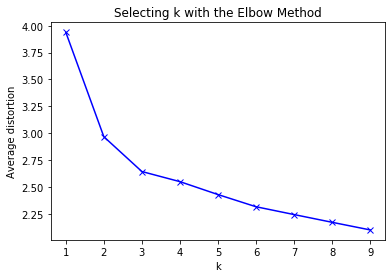

In [11]:
# Elbow plot to idetify the Optimal clusters where there is sharp decline in the SSE
plt.plot(clusters, Cluster_error, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

### Find out the optimal value of K

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F77B139108>,
      dtype=object)

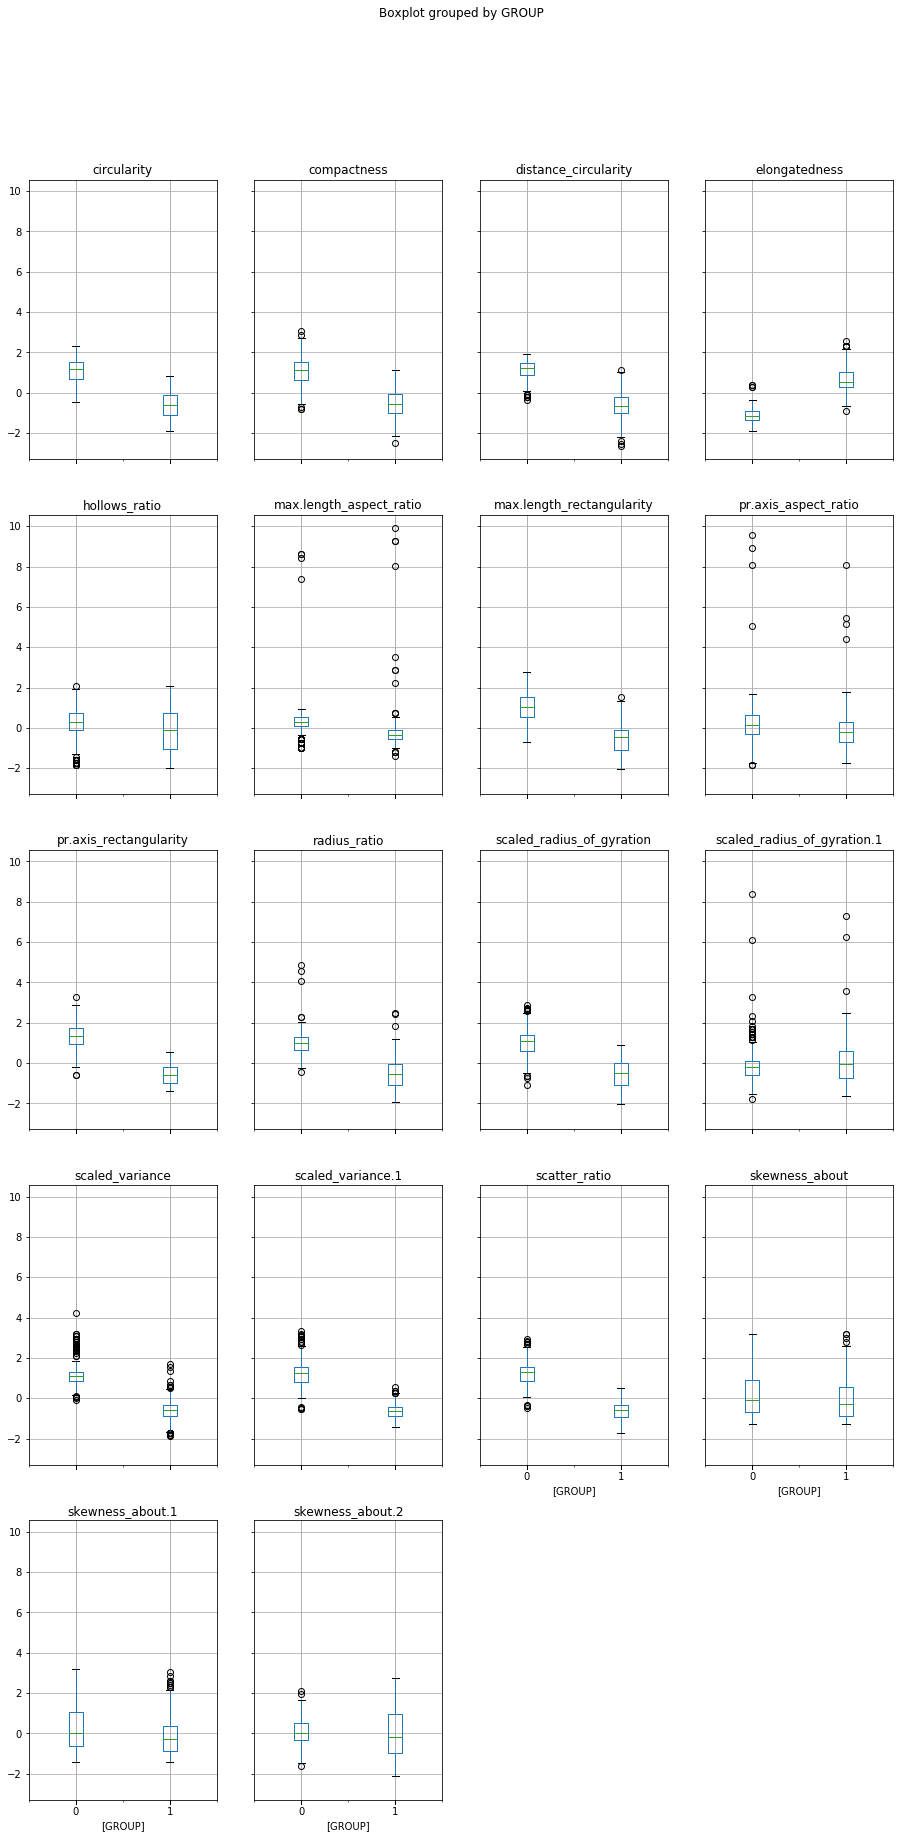

In [12]:
# Let us find the optimal value; K = 2
final_model=KMeans(2)
final_model.fit(vehicle_df_features)
prediction=final_model.predict(vehicle_df_features)
vehicle_df["GROUP"] =  prediction
vehicle_df.boxplot(by = 'GROUP',  figsize=(15, 30))
# when grouped to 2 vehicle types we see outliers in most of the parameters which indicates further hidden pattern;
# hence, moving on to K = 3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F710987208>,
      dtype=object)

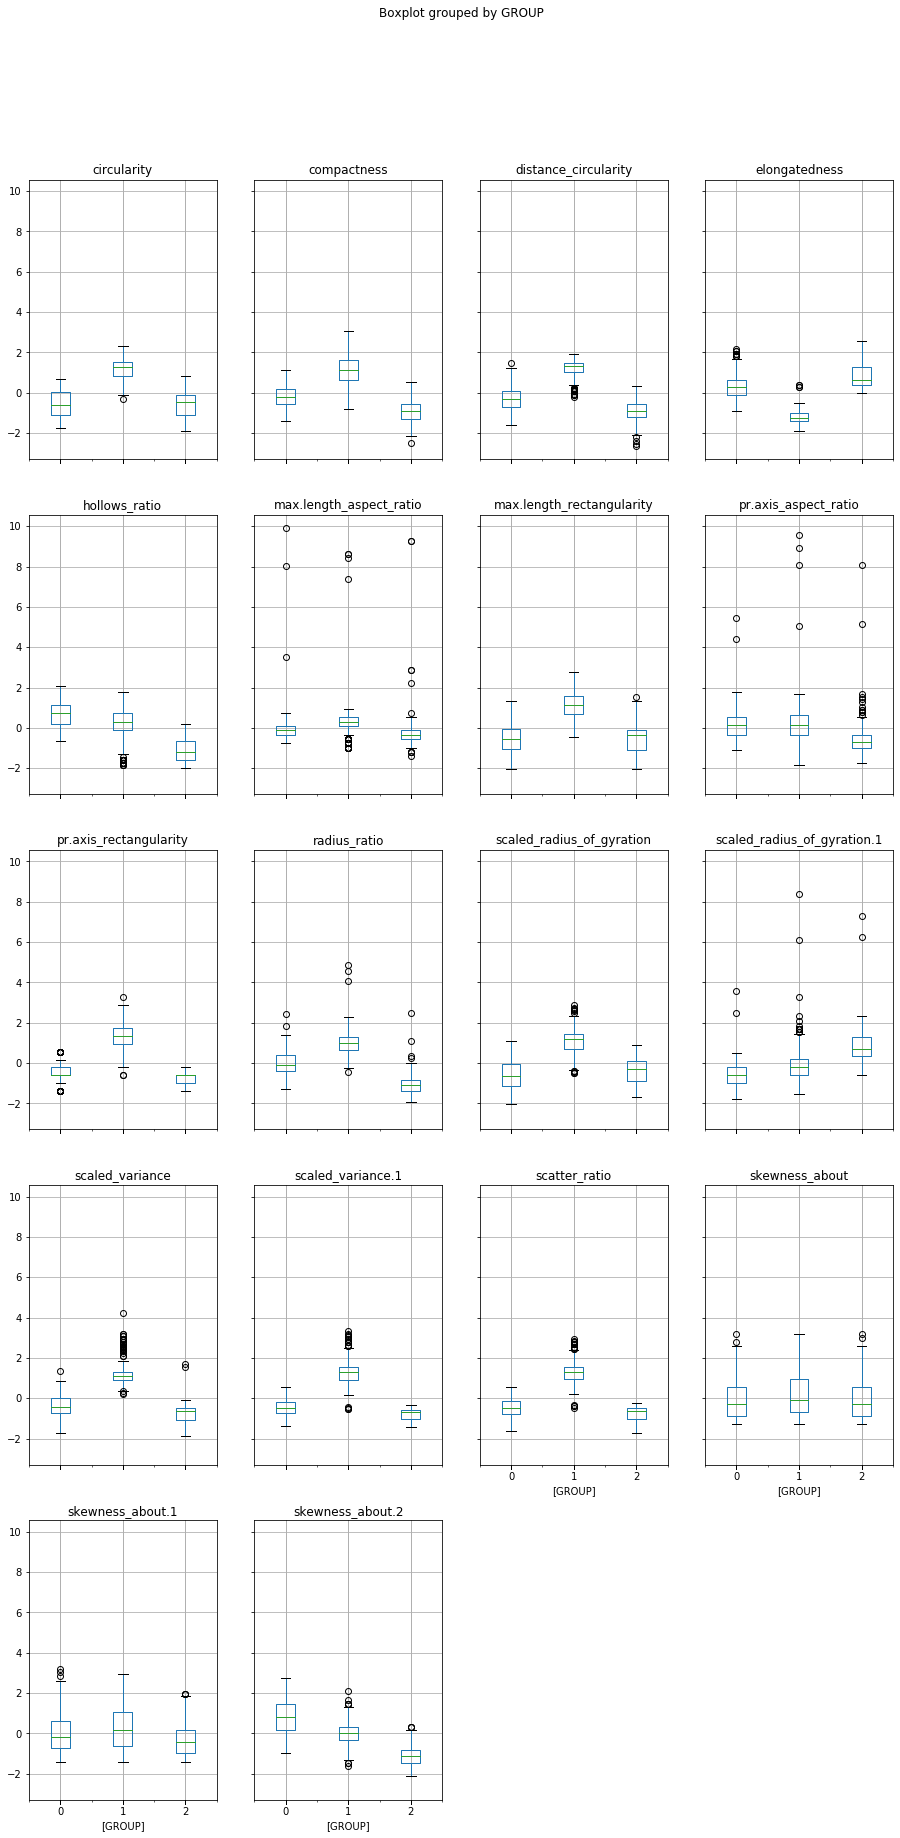

In [13]:
# Let us find the optimal value; K = 3
final_model=KMeans(3)
final_model.fit(vehicle_df_features)
prediction=final_model.predict(vehicle_df_features)
vehicle_df["GROUP"] =  prediction
vehicle_df.boxplot(by = 'GROUP',  figsize=(15, 30))

0    313
1    260
2    240
Name: GROUP, dtype: int64


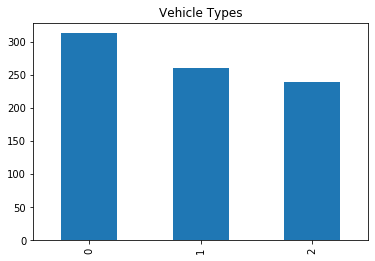

In [14]:
vehicle_df['GROUP'].value_counts().plot.bar(title='Vehicle Types') 
print(vehicle_df['GROUP'].value_counts())
# Based on K= 3 grouping we have the following findings; unlabelled group 0- bus; group 1- car; group 2 - van
# circular, compact and distance circularity are higher for group 1 than group 0 and group 2; 
# --> cars are more sophisticated than bus and Van
# Elongatedness is higher in group 0 than group 1 and 2; 
# --> Buses are lengthier and elongated than car and van
# Hollows_ratio is higher for group 1 and group 2 and less for group 0; outliers found for group 1
# Max length aspect ratio is slightly higher for group 1 than group 0 and group 2
# Max length rectangularity is slightly higher for group 1 than group 0 and group 2
# Good dispersion of data; we can fairly decide the clustering is done better

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F710CDBF08>,
      dtype=object)

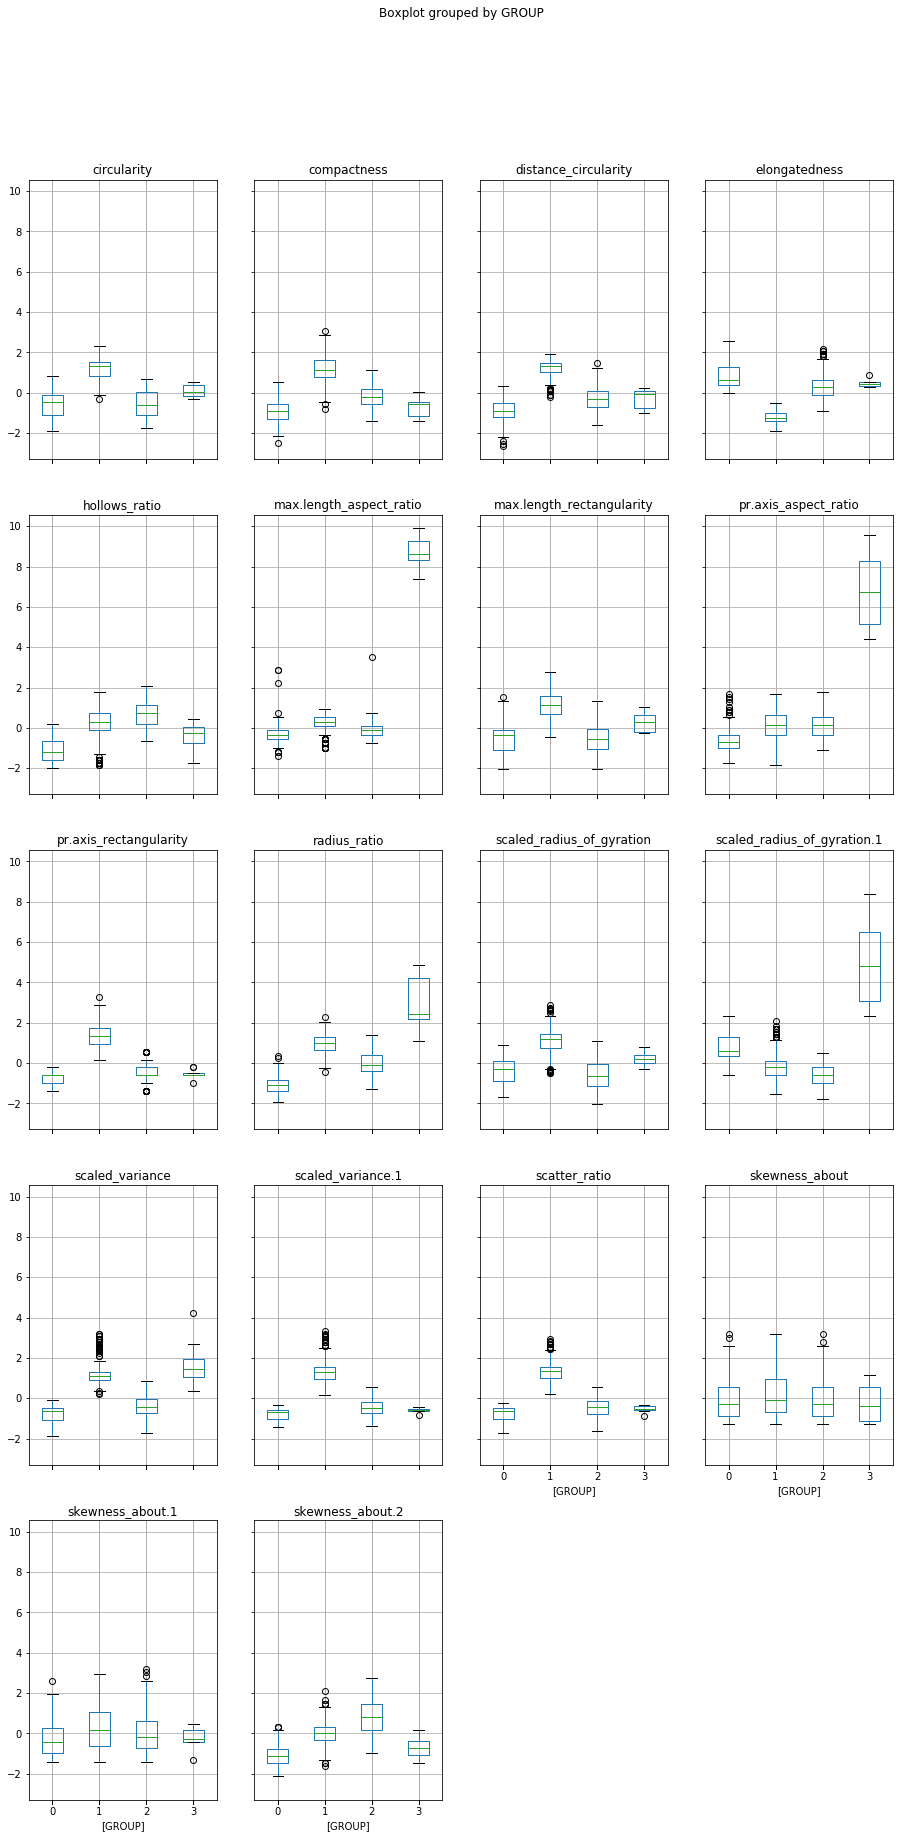

In [15]:
# Let us find the optimal value; K = 4
final_model=KMeans(4)
final_model.fit(vehicle_df_features)
prediction=final_model.predict(vehicle_df_features)
vehicle_df["GROUP"] =  prediction
vehicle_df.boxplot(by = 'GROUP',  figsize=(15, 30))

2    309
1    256
0    240
3      8
Name: GROUP, dtype: int64


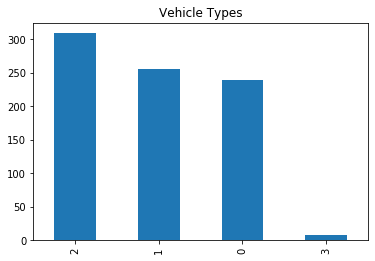

In [16]:
vehicle_df['GROUP'].value_counts().plot.bar(title='Vehicle Types') 
print(vehicle_df['GROUP'].value_counts())
# Based on K= 4 grouping we have the following findings; unlabelled group 0, 1, 2 and 3
# Dispersion of data for Group 3 is very less to draw meaningful conclusions; hence Optimal value of K can be 3
# We will verify that with Silhouette coefficient

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.38978847975148845


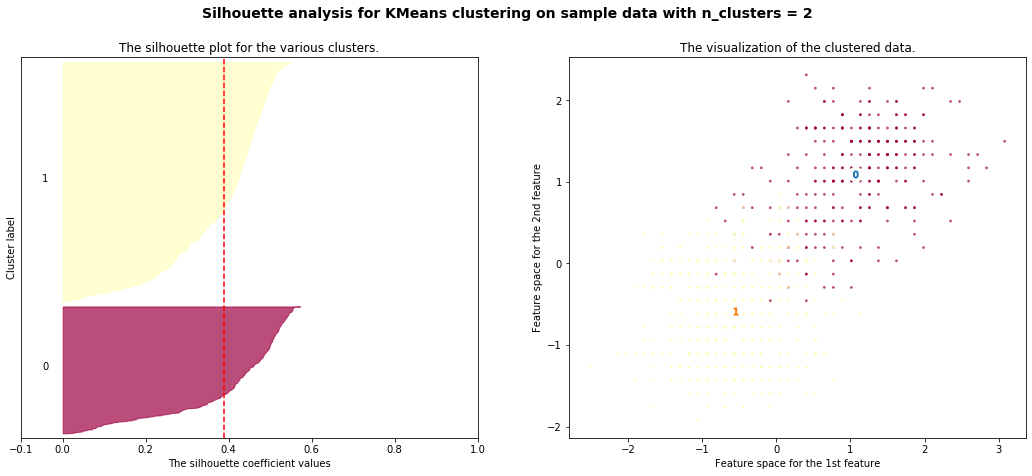

For n_clusters = 3 The average silhouette_score is : 0.29041502127885166


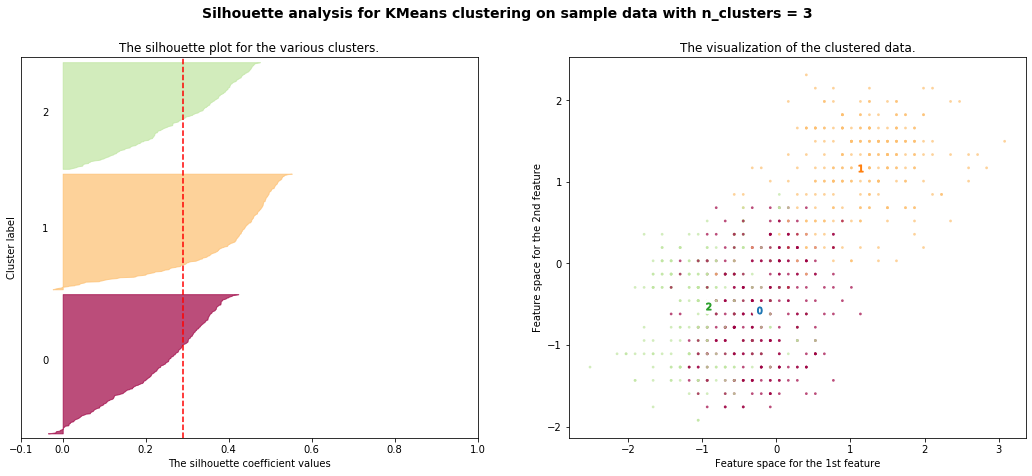

For n_clusters = 4 The average silhouette_score is : 0.30438010062785437


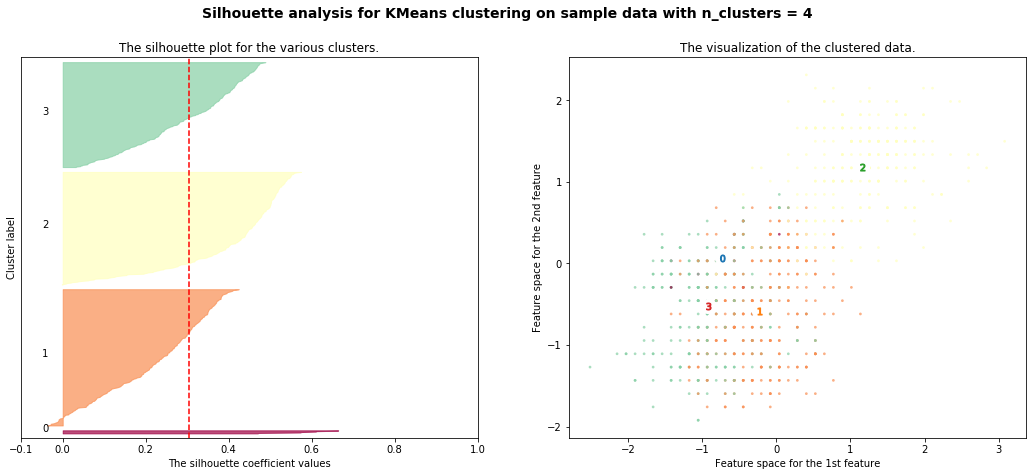

For n_clusters = 5 The average silhouette_score is : 0.2434928366284137


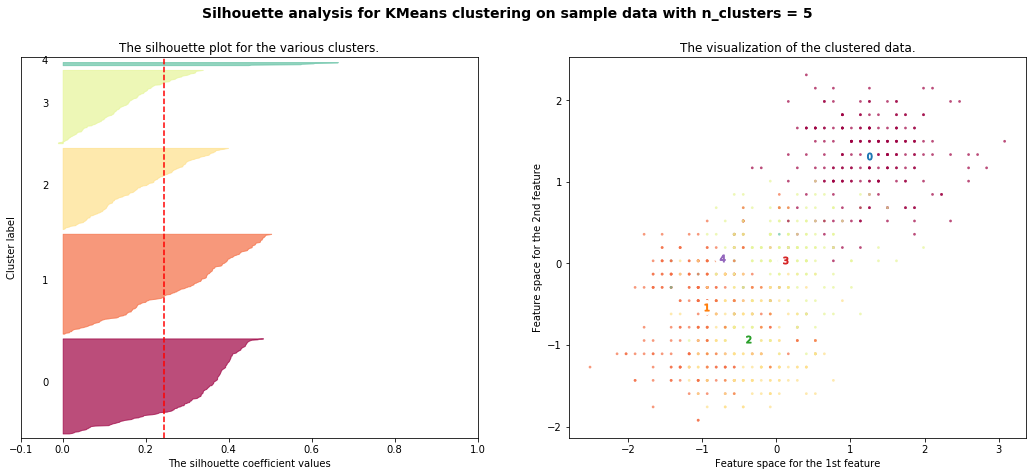

For n_clusters = 6 The average silhouette_score is : 0.212256373845071


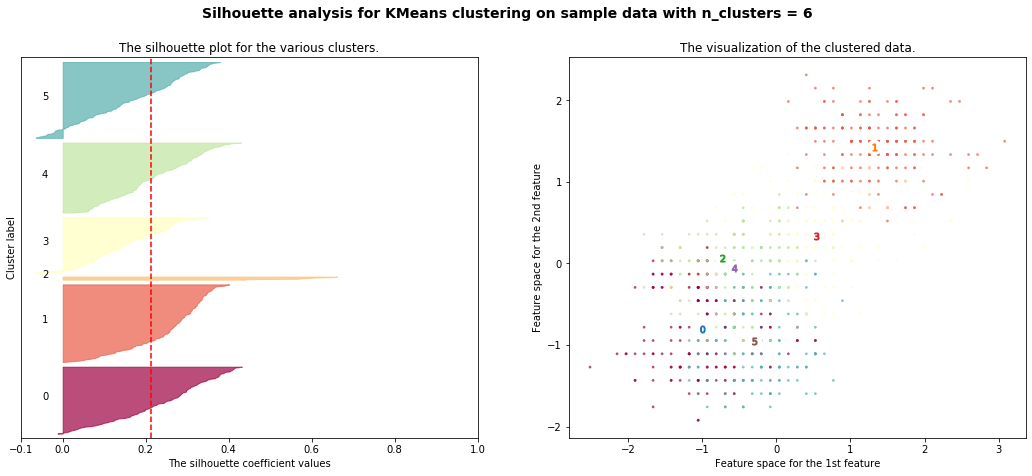

For n_clusters = 7 The average silhouette_score is : 0.20711511077537317


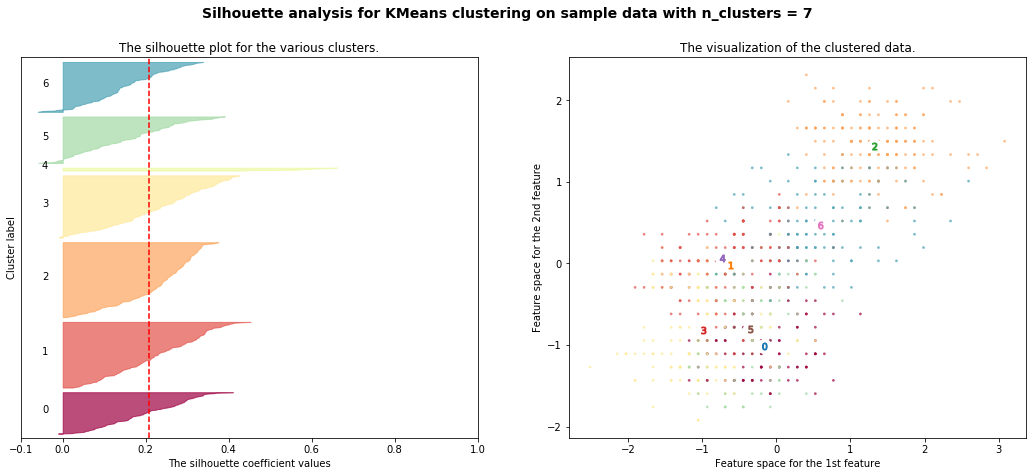

For n_clusters = 8 The average silhouette_score is : 0.19502289960293687


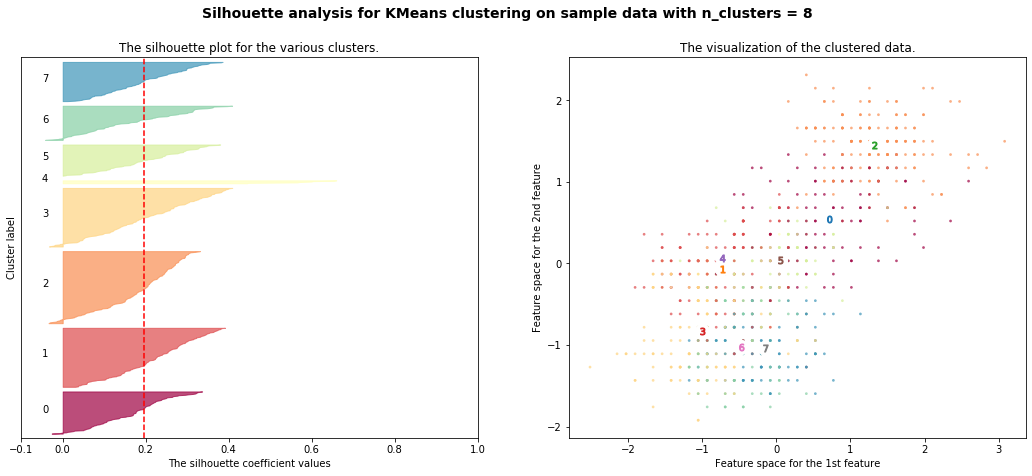

For n_clusters = 9 The average silhouette_score is : 0.19516501973190606


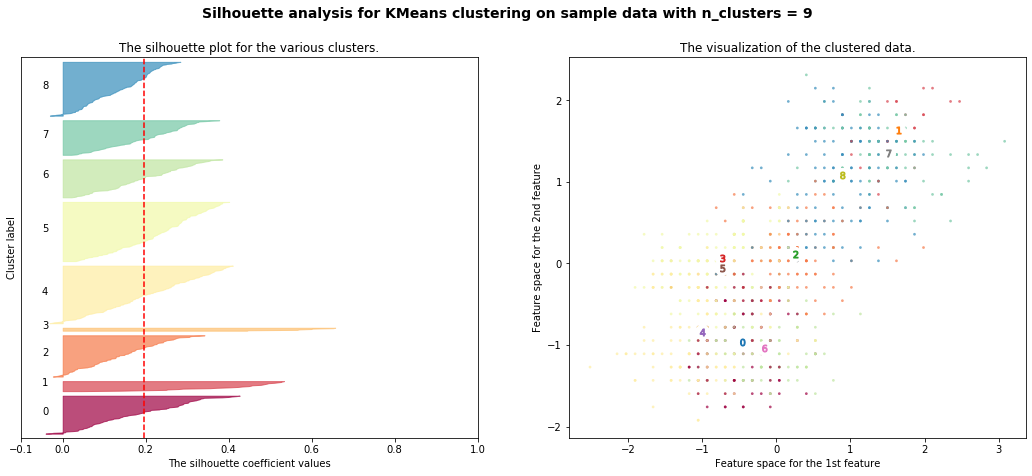

For n_clusters = 10 The average silhouette_score is : 0.19868135806335901


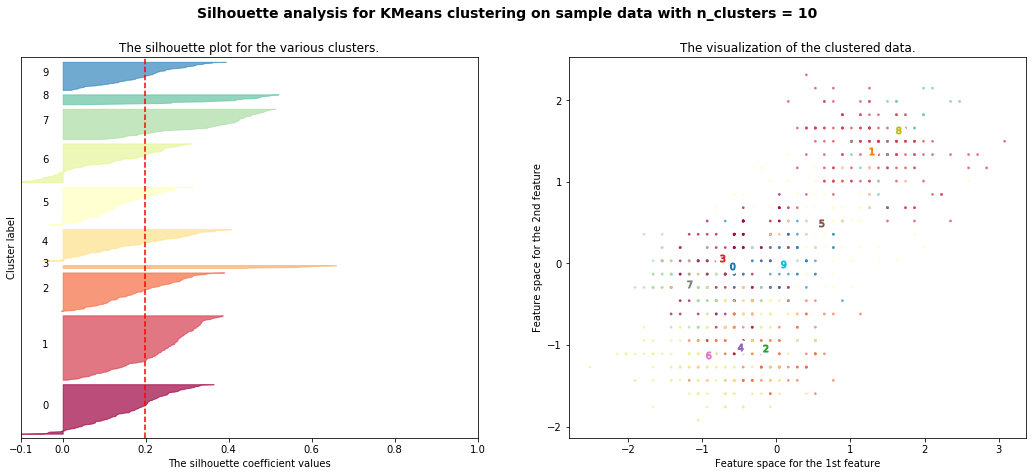

In [17]:
# The below function is from Sklearn for the Silhouette scores - Cluster Analysis ( Kmeans)
from __future__ import print_function
%matplotlib inline


from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X=vehicle_df_features.values

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [ ]:
# Based on the Dispersion of the Data and Silhouette scores for K =2,3,4,5 and 6; Optimal value of K will be 3
# Although the score for K=4 is bit higher; dispersion is better for K=3 with not much difference in the silhouette scores
# optimal value; K = 3; Silhouette score of 0.2904
final_model=KMeans(3)
final_model.fit(vehicle_df_features)
prediction=final_model.predict(vehicle_df_features)
vehicle_df["GROUP"] =  prediction

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

In [19]:
centroids = final_model.cluster_centers_

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [20]:
col_names = vehicle_df_features.columns

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [21]:
c_df = pd.DataFrame(centroids, columns = col_names)
c_df.transpose()

0         1         2
compactness                 -0.919871 -0.233962  1.130765
circularity                 -0.520093 -0.573875  1.170942
distance_circularity        -0.893208 -0.307769  1.195006
radius_ratio                -1.064356 -0.030413  1.019095
pr.axis_aspect_ratio        -0.500422  0.205073  0.215052
max.length_aspect_ratio     -0.219074 -0.116532  0.342508
scatter_ratio               -0.779121 -0.459042  1.271805
elongatedness                0.865893  0.325063 -1.190612
pr.axis_rectangularity      -0.745356 -0.487988  1.275484
max.length_rectangularity   -0.484632 -0.536044  1.092668
scaled_variance             -0.782403 -0.413809  1.220381
scaled_variance.1           -0.783411 -0.463663  1.281327
scaled_radius_of_gyration   -0.384982 -0.601550  1.079542
scaled_radius_of_gyration.1  0.838787 -0.619241 -0.028795
skewness_about              -0.095243 -0.061780  0.162290
skewness_about.1            -0.301716  0.010668  0.265665
skewness_about.2            -1.054206  0.812786 -0.005356
hollows_ratio               -1.110695  0.698973  0.183801

Hint: Use pd.Dataframe function 

### Use kmeans.labels_ function to print out the labels of the classes

In [22]:
vehicle_df['GROUP'] = final_model.labels_
vehicle_df.groupby('GROUP').count() # optimal value of K = 3

compactness  circularity  distance_circularity  radius_ratio  \
GROUP                                                                 
0              240          240                   240           240   
1              313          313                   313           313   
2              260          260                   260           260   

       pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
GROUP                                                                 
0                       240                      240            240   
1                       313                      313            313   
2                       260                      260            260   

       elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
GROUP                                                                     
0                240                     240                        240   
1                313                     313                        313   
2                260                     260                        260   

       scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
GROUP                                                                  
0                  240                240                        240   
1                  313                313                        313   
2                  260                260                        260   

       scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
GROUP                                                                  
0                              240             240               240   
1                              313             313               313   
2                              260             260               260   

       skewness_about.2  hollows_ratio  class  
GROUP                                          
0                   240            240    240  
1                   313            313    313  
2                   260            260    260

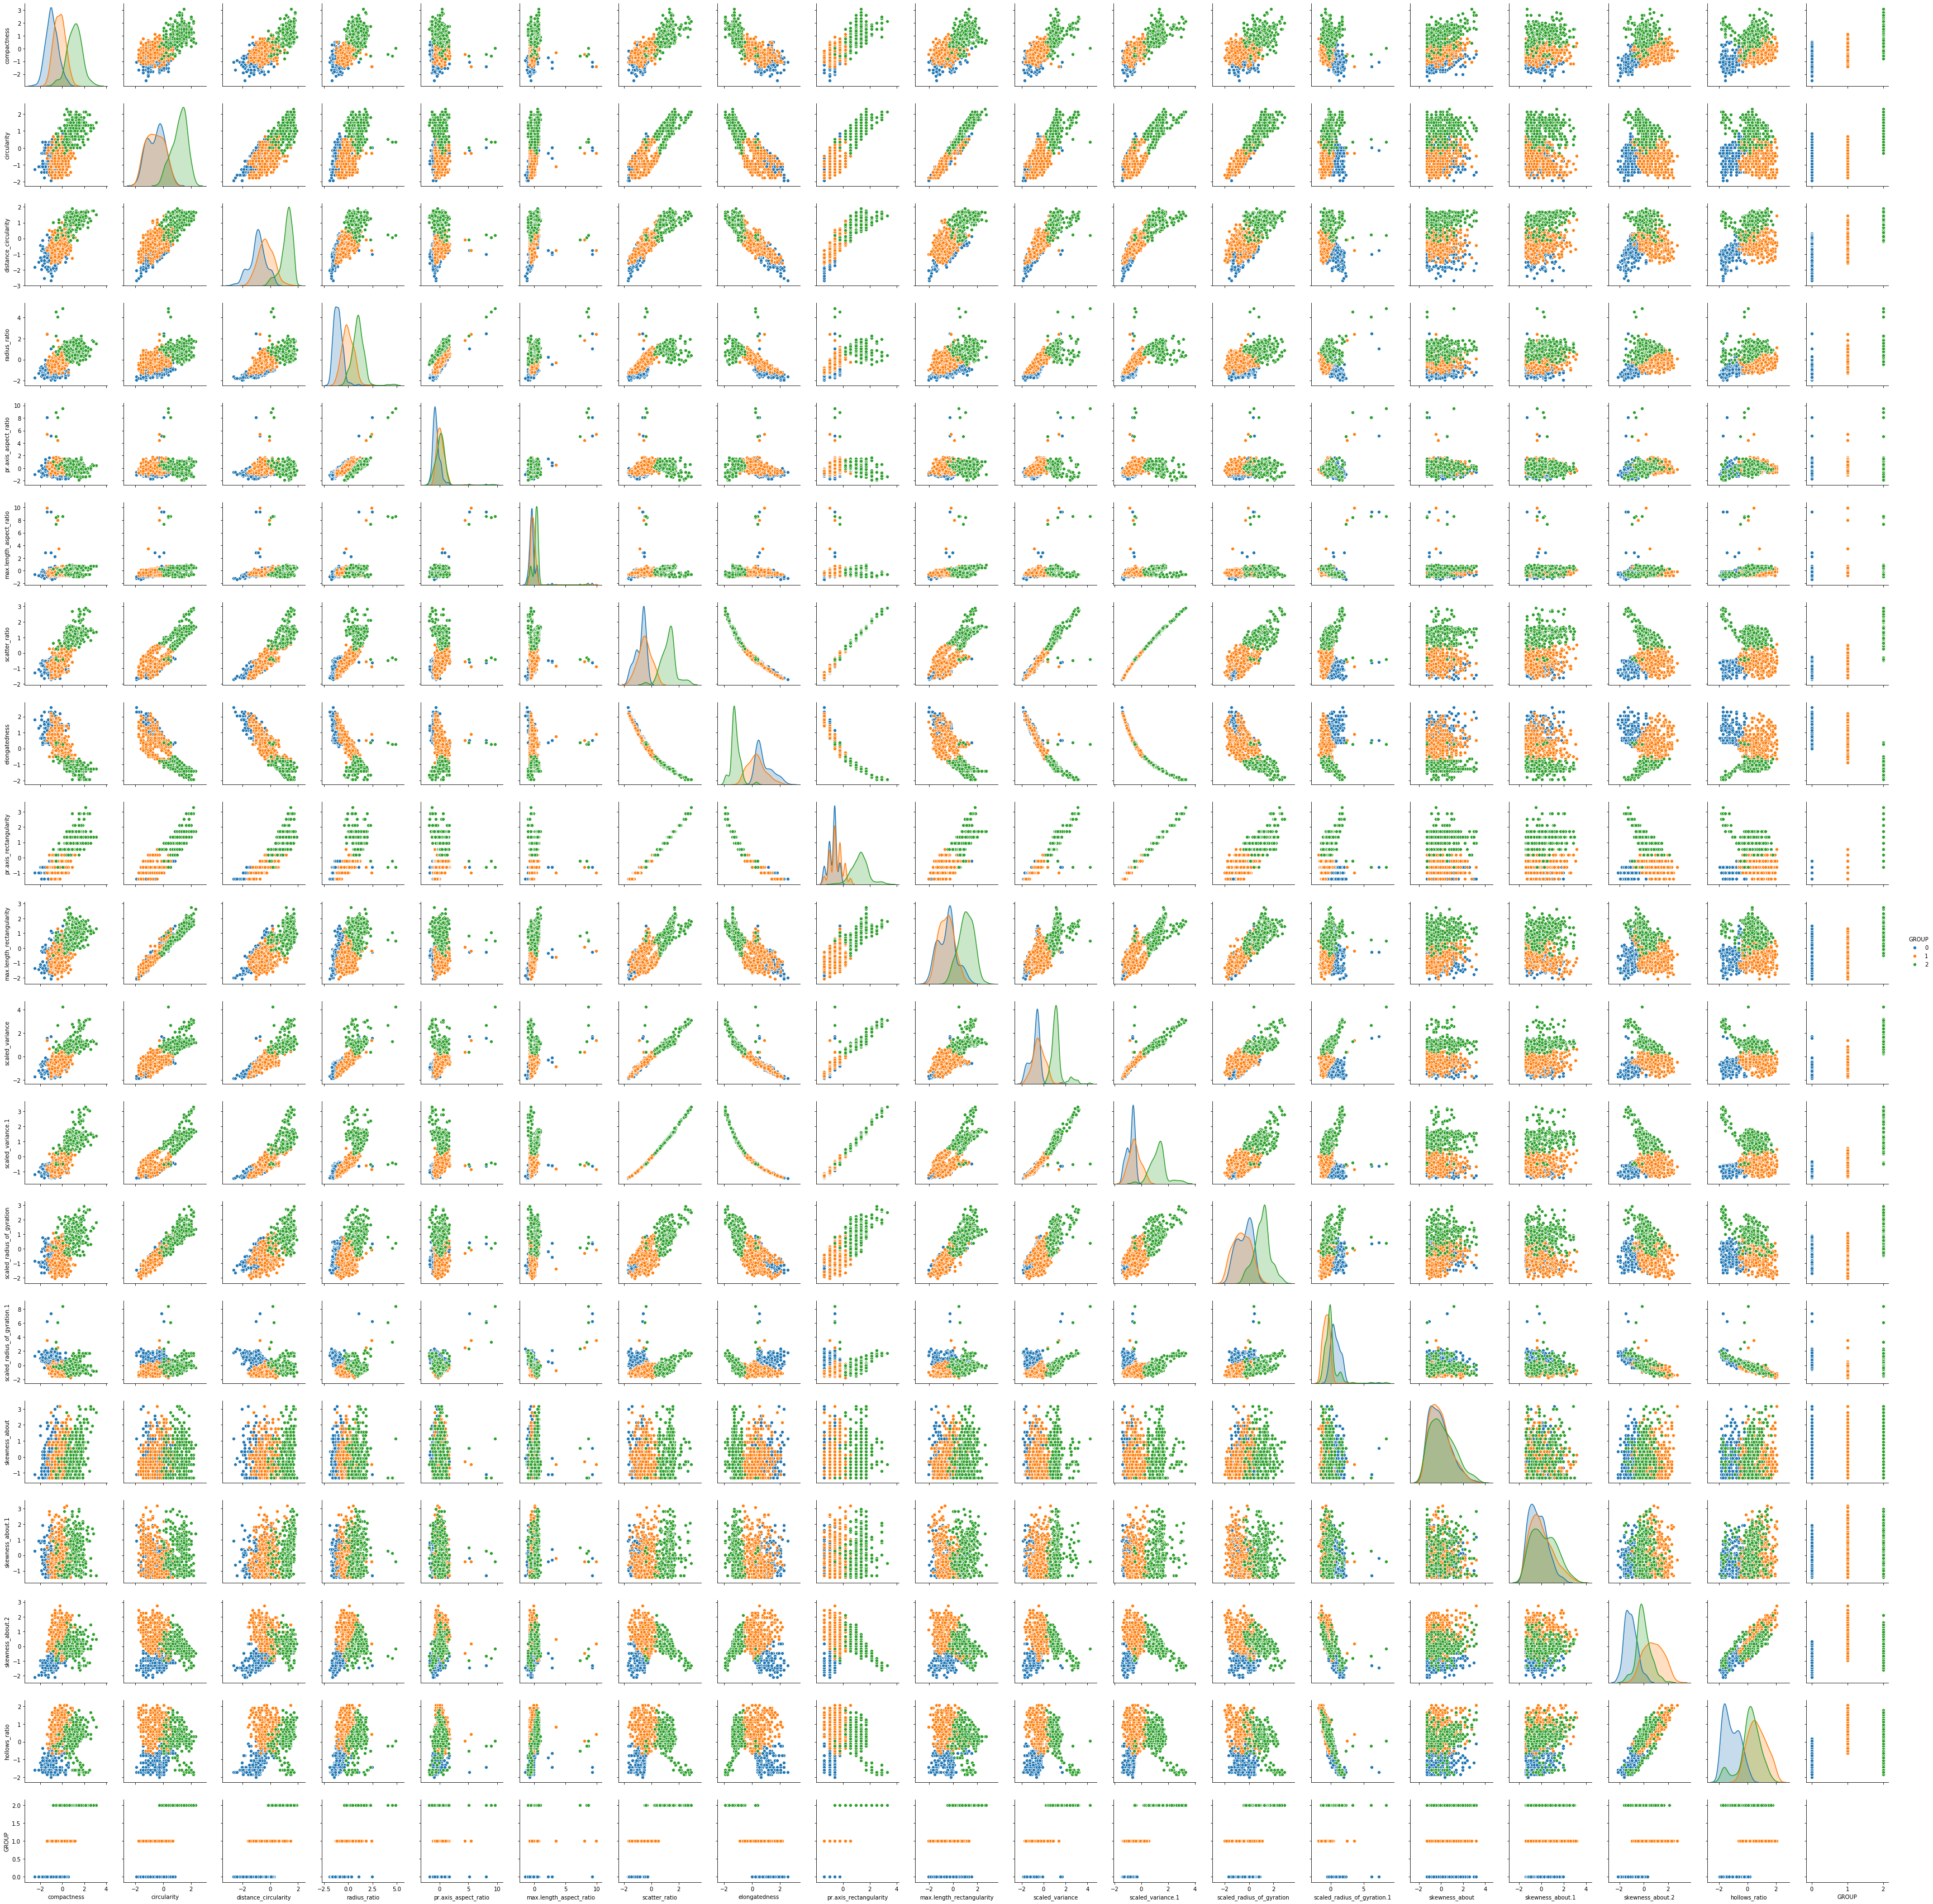

In [23]:
# Visual analysis of Clustering using Pairplot
sns.pairplot(vehicle_df, diag_kind = 'kde', hue = 'GROUP')

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [24]:
np.random.seed(101)  # for repeatability of this dataset
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.multivariate_normal.html

### 9. Combine all three arrays a,b,c into a dataframe

In [25]:
X = np.concatenate((a, b, c),)
HC_df = pd.DataFrame()
HC_df['col1']=X[:,0]
HC_df['col2']=X[:,1]
print(HC_df.shape)
HC_df

(250, 2)


col1       col2
0    13.882785   4.438501
1    11.687256   1.250981
2    10.316397   1.449346
3     9.837412  -2.041974
4     8.691601  -4.289773
..         ...        ...
245   9.248848  24.346291
246   6.958291  16.448655
247  11.260042  20.333577
248   6.889835  21.238297
249  11.221498  24.025093

[250 rows x 2 columns]

### 10. Use scatter matrix to print all the 3 distributions

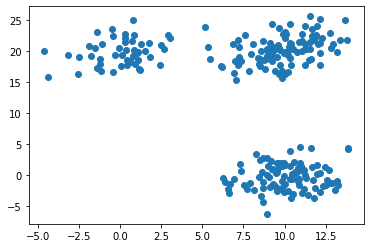

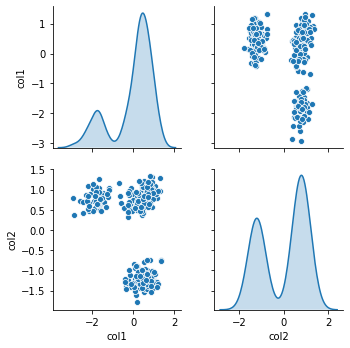

In [26]:
# Scatter Matrix
plt.scatter(X[:,0], X[:,1], cmap = 'prism')
plt.show()
HC_df = HC_df.apply(zscore) # scaling the data
# Pairplot to showcase the distributions
sns.pairplot(HC_df, diag_kind = 'kde')

### 11. Find out the linkage matrix

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html

Use ward as linkage metric and distance as Eucledian

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(HC_df, method='ward', metric='euclidean', optimal_ordering=True)

### 12. Plot the dendrogram for the consolidated dataframe

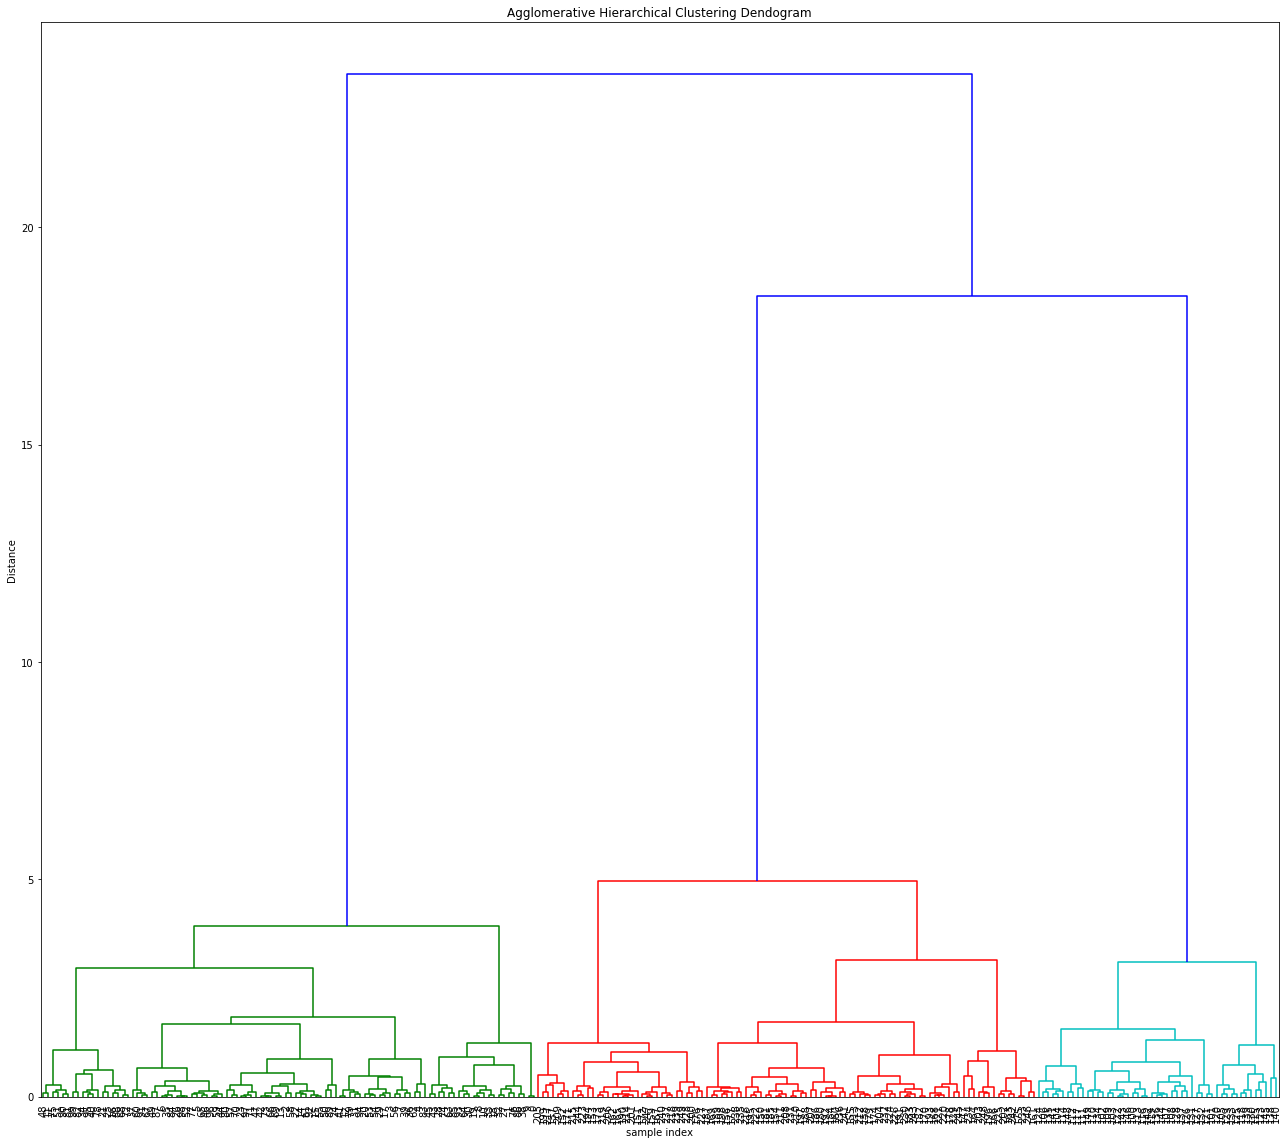

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level')
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

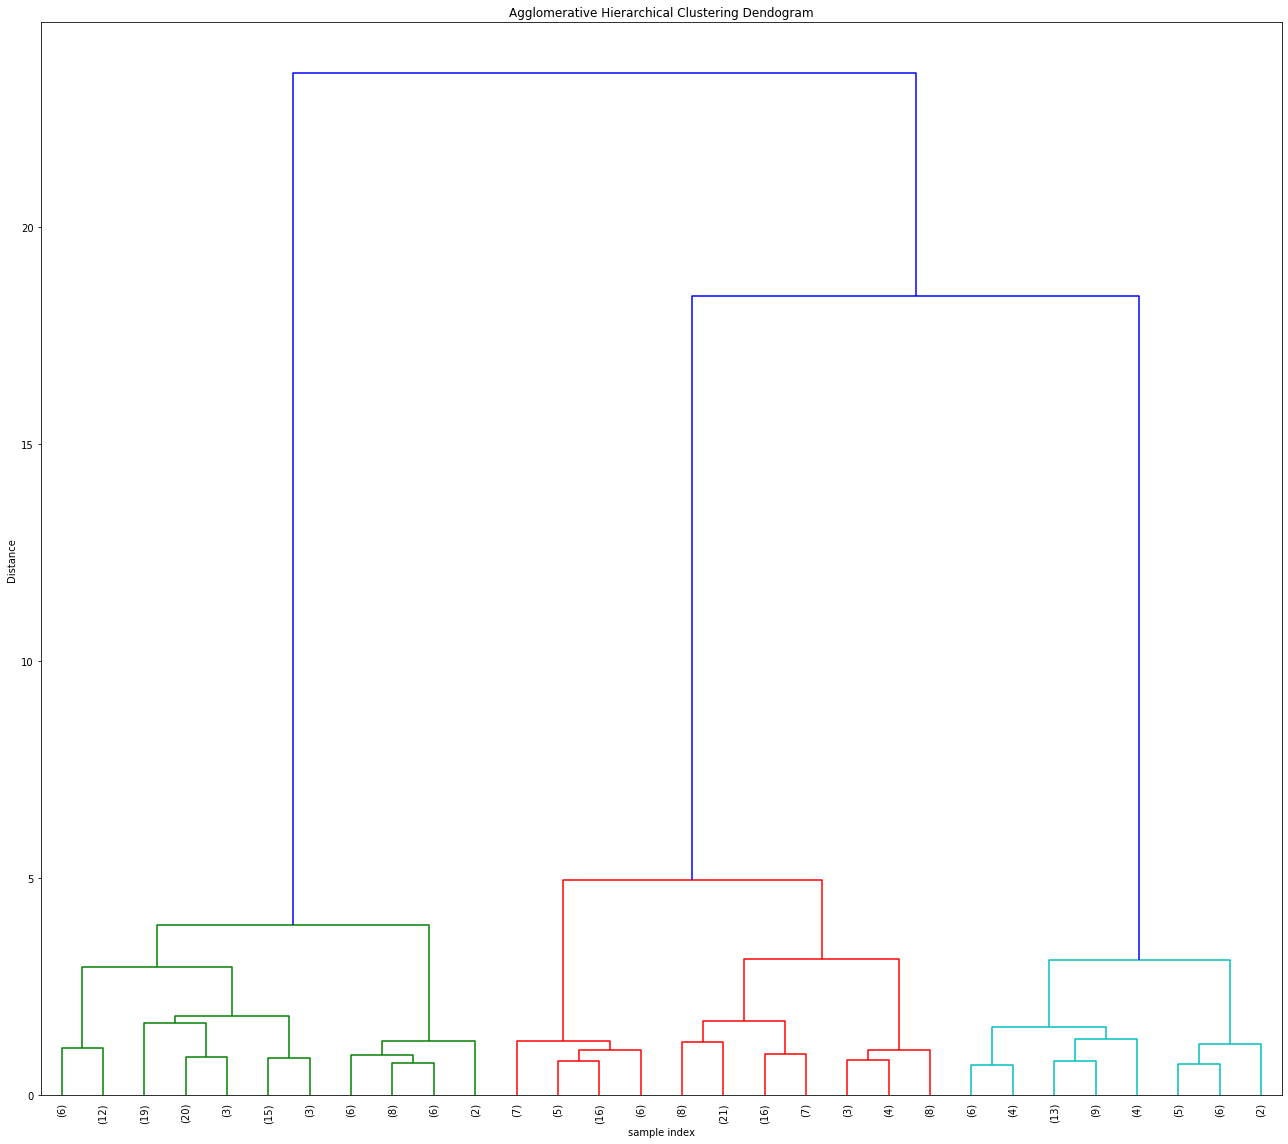

In [30]:
plt.figure(figsize=(18, 16))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='lastp')
plt.tight_layout()

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.cluster.hierarchy.fcluster.html

In [31]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
c, coph_dists = cophenet(Z , pdist(HC_df))
# closer it is to 1, the better is the clustering
c, coph_dists

(0.864721309636431,
 array([1.24062832, 3.92618775, 3.92618775, ..., 4.9572699 , 1.0358595 ,
        4.9572699 ]))

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [32]:
# Identifying the Maximum distance and plotting them in the Dendogram for finding optimal clusters
# Credits: https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

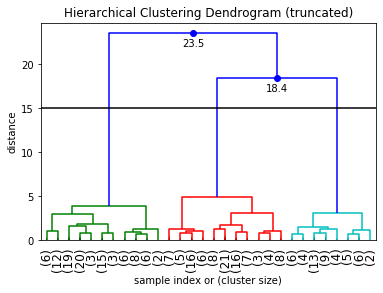

In [33]:
max_d = 15  # setting the cut-off as 15 for the last 12 merged clusters to get optimal clusters(3)
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [34]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters # Based on fcluster we infer the maximum optimal cluster is 3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [35]:
# Performing Agglomotrative clustering based on the Dendogram Analysis
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
model.fit(HC_df)
HC_df['labels'] = model.labels_
HC_df.groupby(["labels"]).count()

col1  col2
labels            
0        101   101
1        100   100
2         49    49

### Use matplotlib to visually observe the clusters in 2D space 

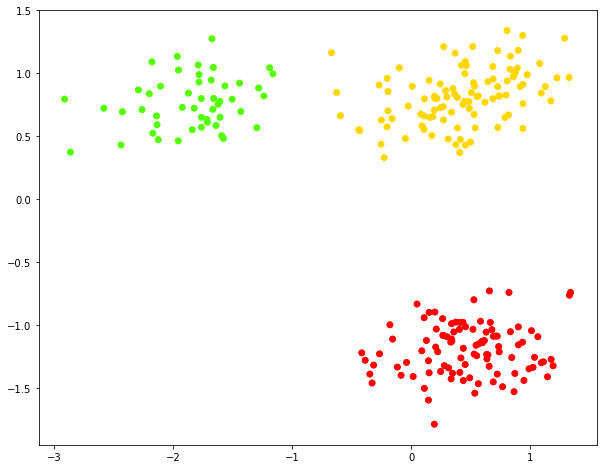

In [36]:
plt.figure(figsize=(10, 8))
plt.scatter(HC_df['col1'], HC_df['col2'], c=clusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()
# Thus we are able to see 3 different clusters for the distribution we started

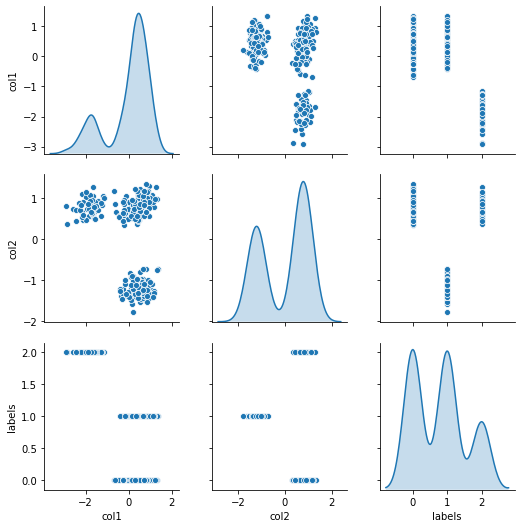

In [37]:
sns.pairplot(HC_df, diag_kind='kde') # Pairplot to visualize the distribution after clustering of data